<a href="https://colab.research.google.com/github/rizqiwr/DataScience/blob/main/everythingstock/Alpha%26Beta_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf


In [ ]:
data = yf.download('AAPL, SPY', start='2015-01-01', end='2020-01-01')
asset = data['Adj Close'].AAPL
benchmark= data['Adj Close'].SPY


[*********************100%***********************]  2 of 2 completed


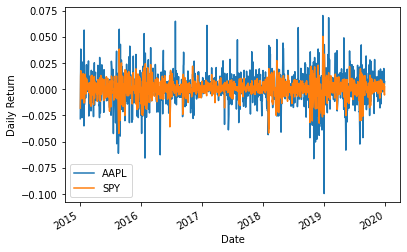

In [ ]:
asset_returns=asset.pct_change().dropna()
benchmark_returns=benchmark.pct_change().dropna()
asset_returns.plot()
benchmark_returns.plot()
plt.ylabel('Daily Return')
plt.legend()

In [ ]:
X = benchmark_returns.values
Y = asset_returns.values
def linreg(x,y):
  #add column of 1s to fit alpha
  x = sm.add_constant(x)
  model=regression.linear_model.OLS(y,x).fit()
  #remove the constant now thst we're done
  x=x[:,1]
  return model.params[0], model.params[1]
alpha, beta = linreg(X,Y)
print(f'Alpha:{alpha}')
print(f'Beta:{beta}')

Alpha:0.00039093382709810923
Beta:1.2415387084488811


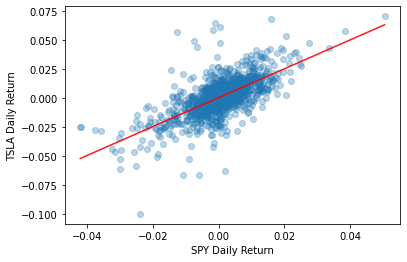

In [ ]:
X2=np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha
#plotting raw data
plt.scatter(X, Y, alpha=0.3)
plt.xlabel('SPY Daily Return')
plt.ylabel('TSLA Daily Return')
#add the regression line
plt.plot(X2, Y_hat, 'r', alpha=0.9);

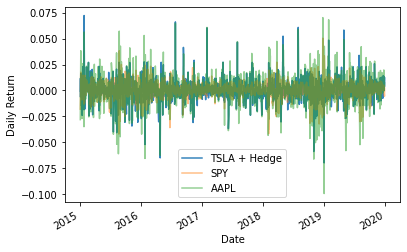

In [ ]:
portfolio = -1 *beta*benchmark_returns+asset_returns
portfolio.name = 'TSLA + Hedge'
portfolio.plot(alpha=0.9)
benchmark_returns.plot(alpha=0.5);
asset_returns.plot(alpha=0.5);
plt.ylabel('Daily Return')
plt.legend();

In [ ]:
P = portfolio.values
alpha, beta = linreg(X,P)
print(f'Alpha: {alpha}')
print(f'Beta: {beta}')

Alpha: 0.00039093382709811026
Beta: -2.5351357298142307e-16
